<ipython-input-1-b12bbc21fe17>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains(year)].sum(axis = 1).tolist()
<ipython-input-1-b12bbc21fe17>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains('|'.join(reddit_year_list[:-1]))].sum(axis = 1).tolist()
<ipython-input-1-b12bbc21fe17>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

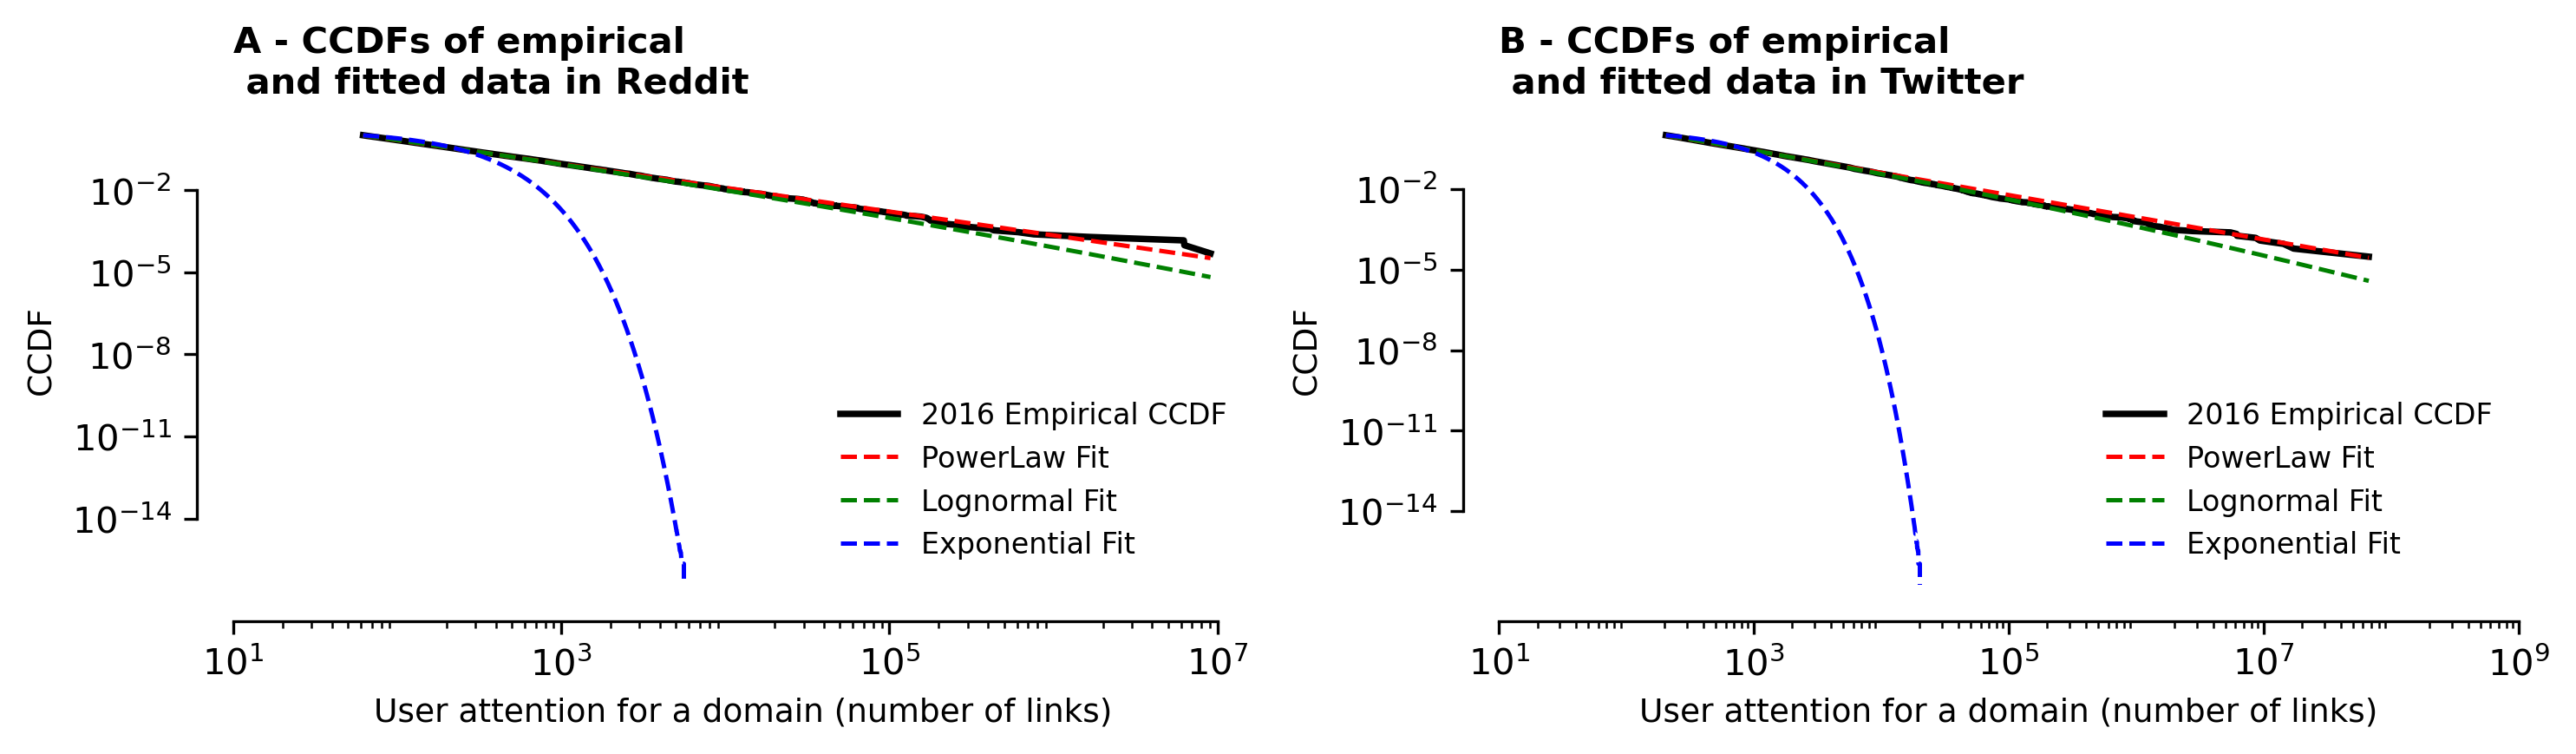

In [1]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import powerlaw

%matplotlib inline
plt.rcParams['figure.dpi'] = 300

# Load Reddit Data
df_reddit = pd.read_csv('../data/reddit.csv.xz')
df_reddit_plot = df_reddit[['Domain']]
df_reddit.set_index('Domain', inplace = True)

reddit_year_list = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019', 'All']
for year in reddit_year_list:
    if year != 'All':
        df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains(year)].sum(axis = 1).tolist()
    else:
        df_reddit_plot[year] = df_reddit.loc[:,df_reddit.columns.str.contains('|'.join(reddit_year_list[:-1]))].sum(axis = 1).tolist()
        

# Load Twitter Data
df_twitter1 = pd.read_csv('../data/twitter.csv.1.xz')
df_twitter2 = pd.read_csv('../data/twitter.csv.2.xz')
df_twitter = pd.concat([df_twitter1, df_twitter2], axis = 0)
df_twitter_plot = df_twitter[['Domain']]
df_twitter.set_index('Domain', inplace = True)

twitter_year_list = ['2011','2012','2013','2014','2015','2016','2017','2018','2019', 'All']
for year in twitter_year_list:
    if year != 'All':
        df_twitter_plot[year] = df_twitter.loc[:,df_twitter.columns.str.contains(year)].sum(axis = 1).tolist()
    else:
        df_twitter_plot[year] = df_twitter.loc[:,df_twitter.columns.str.contains('|'.join(twitter_year_list[:-1]))].sum(axis = 1).tolist()
        

# Fit Power Law models for Reddit and Twitter datasets
fit_reddit_2016 = powerlaw.Fit(df_reddit_plot['2016'][df_reddit_plot['2016'] > 0], fit_method = 'KS')
fit_twitter_2016 = powerlaw.Fit(df_twitter_plot['2016'][df_twitter_plot['2016'] > 0], fit_method = 'KS')

# FigS3 in paper
fig_ccdf_comparison, (ax6, ax7) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

fit_reddit_2016.plot_ccdf(color = 'k', label = '2016 Empirical CCDF', linewidth=1.8, ax = ax6)
fit_reddit_2016.power_law.plot_ccdf(color = 'r', ax = ax6, label = 'PowerLaw Fit', linestyle = 'dashed', linewidth=1.2)
fit_reddit_2016.lognormal.plot_ccdf(color = 'g', ax = ax6, label = 'Lognormal Fit', linestyle = 'dashed', linewidth=1.2)
fit_reddit_2016.exponential.plot_ccdf(color = 'b', ax = ax6, label = 'Exponential Fit', linestyle = 'dashed', linewidth=1.2)
ax6.set_xticks([1e+01, 1e+03, 1e+05, 1e+07])
ax6.set_xlabel('User attention for a domain (number of links)', fontdict = {'fontsize': 9})
ax6.set_ylabel('CCDF', fontdict = {'fontsize': 9})
ax6.set_title('A - CCDFs of empirical \n and fitted data in Reddit' , loc = 'left', 
              fontdict = {'fontsize': 10, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True, ax = ax6)
legend6 = ax6.legend(loc = 'lower right', prop={'size': 8})
frame6 = legend6.get_frame()
frame6.set_facecolor('white')
frame6.set_edgecolor('white')

fit_twitter_2016.plot_ccdf(color = 'k', label = '2016 Empirical CCDF', linewidth=1.8, ax = ax7)
fit_twitter_2016.power_law.plot_ccdf(color = 'r', ax = ax7, label = 'PowerLaw Fit', linestyle = 'dashed', linewidth=1.2)
fit_twitter_2016.lognormal.plot_ccdf(color = 'g', ax = ax7, label = 'Lognormal Fit', linestyle = 'dashed', linewidth=1.2)
fit_twitter_2016.exponential.plot_ccdf(color = 'b', ax = ax7, label = 'Exponential Fit', linestyle = 'dashed', linewidth=1.2)
ax7.set_xticks([1e+01, 1e+03, 1e+05, 1e+07, 1e+09])
ax7.set_xlabel('User attention for a domain (number of links)', fontdict = {'fontsize': 9})
ax7.set_ylabel('CCDF', fontdict = {'fontsize': 9})
ax7.set_title('B - CCDFs of empirical \n and fitted data in Twitter' , loc = 'left', 
              fontdict = {'fontsize': 10, 'fontweight': 'bold', 'horizontalalignment': 'left'})
sns.despine(offset=10, trim=True, ax = ax7)
legend7 = ax7.legend(loc = 'lower right', prop={'size': 8})
frame7 = legend7.get_frame()
frame7.set_facecolor('white')
frame7.set_edgecolor('white')

plt.tight_layout()
fig_ccdf_comparison.savefig('../plots/FigS3.pdf')
fig_ccdf_comparison.show()